In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
cens=pd.read_csv("conjunto_de_datos_iter_00CSV20.csv")
cens = cens[(cens['LOC'] == 0) & (cens['MUN'] >= 1) & (cens['ENTIDAD'] >= 1)]
vari=['MUN', 'NOM_ENT',  'NOM_MUN',"P15PRI_IN", "P15SEC_IN", "POCUPADA", "PSINDER","P15YM_AN", "GRAPROES", "VPH_3YMASC", "VPH_DSADMA", "VPH_AUTOM", "VPH_MOTO"]
df=cens[vari]




C:\Users\aethe\AppData\Local\Temp\ipykernel_14872\2599821660.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cens=pd.read_csv("conjunto_de_datos_iter_00CSV20.csv")


In [2]:
df=df[df["NOM_ENT"]=="Ciudad de México"]

In [3]:
df=df.reset_index()

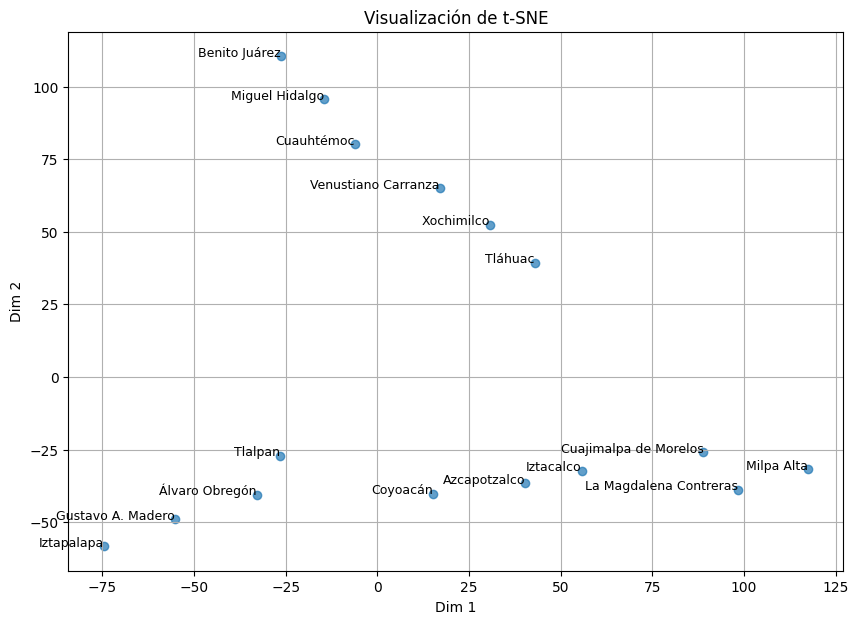

In [11]:



# Selecciona las columnas numéricas para aplicar t-SNE (excluyendo 'Entidad')
X = df.drop(columns=['NOM_ENT', "MUN", "NOM_MUN"])


# Asegúrate de que no hay valores categóricos ni missing values
X = X.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' else x)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, perplexity=3, random_state=10)
X_tsne = tsne.fit_transform(X_scaled)


# Crear un DataFrame con los resultados de t-SNE
df_tsne = pd.DataFrame(X_tsne, columns=['Dim 1', 'Dim 2'])
df_tsne['Entidad'] = df['NOM_MUN']


# Graficar los resultados de t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(df_tsne['Dim 1'], df_tsne['Dim 2'], alpha=0.7)
for i, entidad in enumerate(df_tsne['Entidad']):
    plt.text(df_tsne['Dim 1'][i], df_tsne['Dim 2'][i], entidad, fontsize=9, ha='right')
plt.title('Visualización de t-SNE')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()


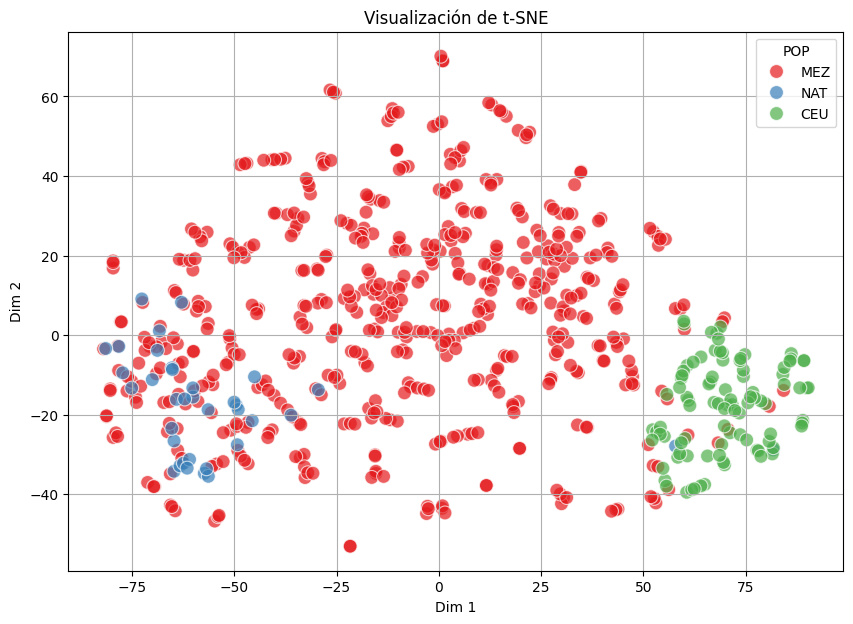

In [21]:
import seaborn as sns
aims=pd.read_excel("Ancestria.xlsx")

aims=aims.dropna()
# Selecciona las columnas numéricas para aplicar t-SNE (excluyendo 'Entidad')
X = aims.drop(columns=["FOLIO", "POP"])


# Asegúrate de que no hay valores categóricos ni missing values
X = X.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' else x)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


# Crear un DataFrame con los resultados de t-SNE
df_tsne = pd.DataFrame(X_tsne, columns=['Dim 1', 'Dim 2'])
df_tsne['POP'] = aims['POP']


# Graficar los resultados de t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim 1', y='Dim 2', hue='POP', data=df_tsne, palette='Set1', alpha=0.7, s=100)
plt.title('Visualización de t-SNE')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()

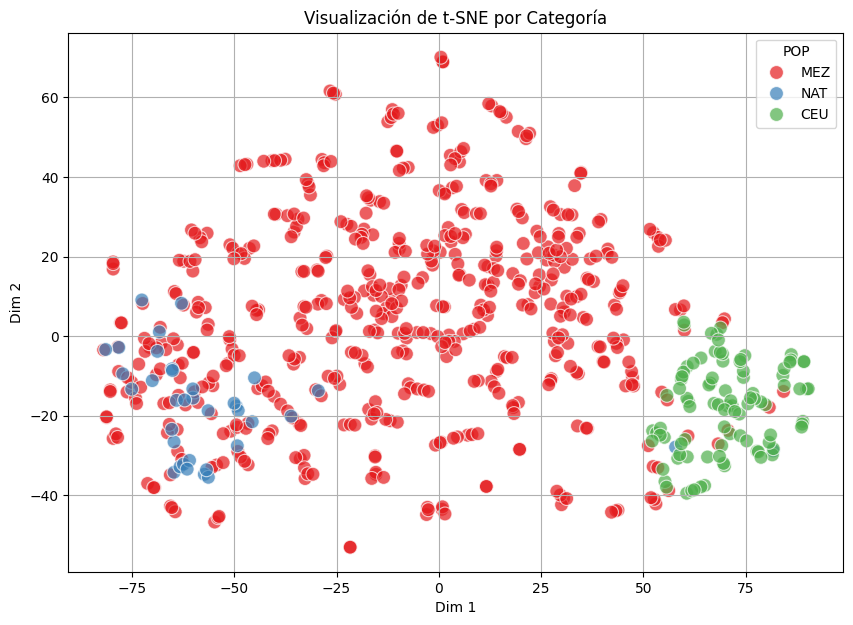

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Leer el archivo
aims = pd.read_excel("Ancestria.xlsx")

# Eliminar filas con valores nulos
aims = aims.dropna()

# Selecciona las columnas numéricas para aplicar t-SNE (excluyendo 'Entidad')
X = aims.drop(columns=["FOLIO", "POP"])

# Convertir columnas categóricas a numéricas si es necesario
X = X.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' else x)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de t-SNE
df_tsne = pd.DataFrame(X_tsne, columns=['Dim 1', 'Dim 2'])
df_tsne['POP'] = aims['POP']

# Graficar los resultados de t-SNE con colores para cada categoría de 'POP'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim 1', y='Dim 2', hue='POP', data=df_tsne, palette='Set1', alpha=0.7, s=100)

# Personalizar la gráfica
plt.title('Visualización de t-SNE por Categoría')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()
